**Setup**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/pd_diagnosis/Zeno Paper/normalized_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('number_of_taps', axis=1, inplace=True)
df.head()

,recordId,healthCode,diagnosis,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,gait_accel_rms_y,gait_accel_rms_z,gait_accel_rms,gait_accel_std_x,gait_accel_std_y,gait_accel_std_z,gait_accel_dom_freq,gait_accel_mean_freq,gait_accel_spectral_centroid,gait_accel_spectral_spread
0,f0608ed2-b581-41a3-b9f7-92110cc67f53,261dd050-4f8e-4582-889e-ff7081706d9e,0,0.599165,-3.553556,1.712746,0.646849,-0.405648,1.209048,1.627549,...,-0.012576,-0.263329,-0.043021,0.224374,0.033868,-0.163448,0,1.513348,1.513348,1.403931
1,91d63a7e-6189-42a7-be01-0035b49b96ce,7bc86881-7075-467a-850e-53e021b60f9f,1,0.193467,1.082631,-0.481740,-0.574674,1.068973,0.183910,-0.224288,...,0.408375,1.507706,0.729936,0.191261,0.445651,1.417896,0,0.257841,0.257841,-0.082680
2,382d9576-6460-40c7-8fee-f84a9bbfae29,d49fcd5c-3952-49ba-bc03-261b83a7ab6e,1,-1.100454,-0.451838,-0.944197,1.545152,-0.485870,-0.706618,-1.242688,...,1.203881,0.713274,0.888146,0.828928,1.458341,0.923263,0,0.492227,0.492227,0.105395
3,c8e9ce91-b3b4-44b5-a306-e93efe82ebbe,34e2480b-3454-458b-86b0-47e176741b60,0,1.562682,-0.294987,-1.094885,0.113474,-0.431032,0.353068,0.803205,...,-0.680230,-0.785442,-0.744389,-0.567200,-0.717305,-0.757088,0,2.414406,2.414406,2.505850
4,6e7d0cef-3896-4700-a043-05975abec4f4,83c7de09-2ed3-409b-abdb-fc75750d10fe,1,-0.398626,0.413502,0.550139,-0.765826,1.241105,0.014752,0.542498,...,-0.531793,-0.534428,-0.564980,-0.404805,-0.561383,-0.607498,0,-0.077595,-0.077595,0.086567


**Training Preliminary Model**

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import numpy as np

features_final = df.loc[:, 'PC2':]
labels_final = df['diagnosis']

kf_final = KFold(n_splits=5, shuffle=True, random_state=740)

accuracy_scores_rf = []
recall_scores_rf = []
precision_scores_rf = []
feature_importances_rf = []

for train_index, test_index in kf_final.split(features_final):
    X_train_final, X_test_final = features_final.iloc[train_index], features_final.iloc[test_index]
    y_train_final, y_test_final = labels_final.iloc[train_index], labels_final.iloc[test_index]

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_final, y_train_final)

    predictions_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test_final, predictions_rf)
    recall_rf = recall_score(y_test_final, predictions_rf)
    precision_rf = precision_score(y_test_final, predictions_rf)
    accuracy_scores_rf.append(accuracy_rf)
    recall_scores_rf.append(recall_rf)
    precision_scores_rf.append(precision_rf)
    feature_importance = model_rf.feature_importances_
    feature_importances_rf.append(feature_importance)

average_accuracy_rf = np.mean(accuracy_scores_rf)
average_accuracy_rf

0.7095282146160962

**Graphing Significant Features**

In [4]:
feature_importances_avg = np.mean(np.array(feature_importances_rf), axis=0)

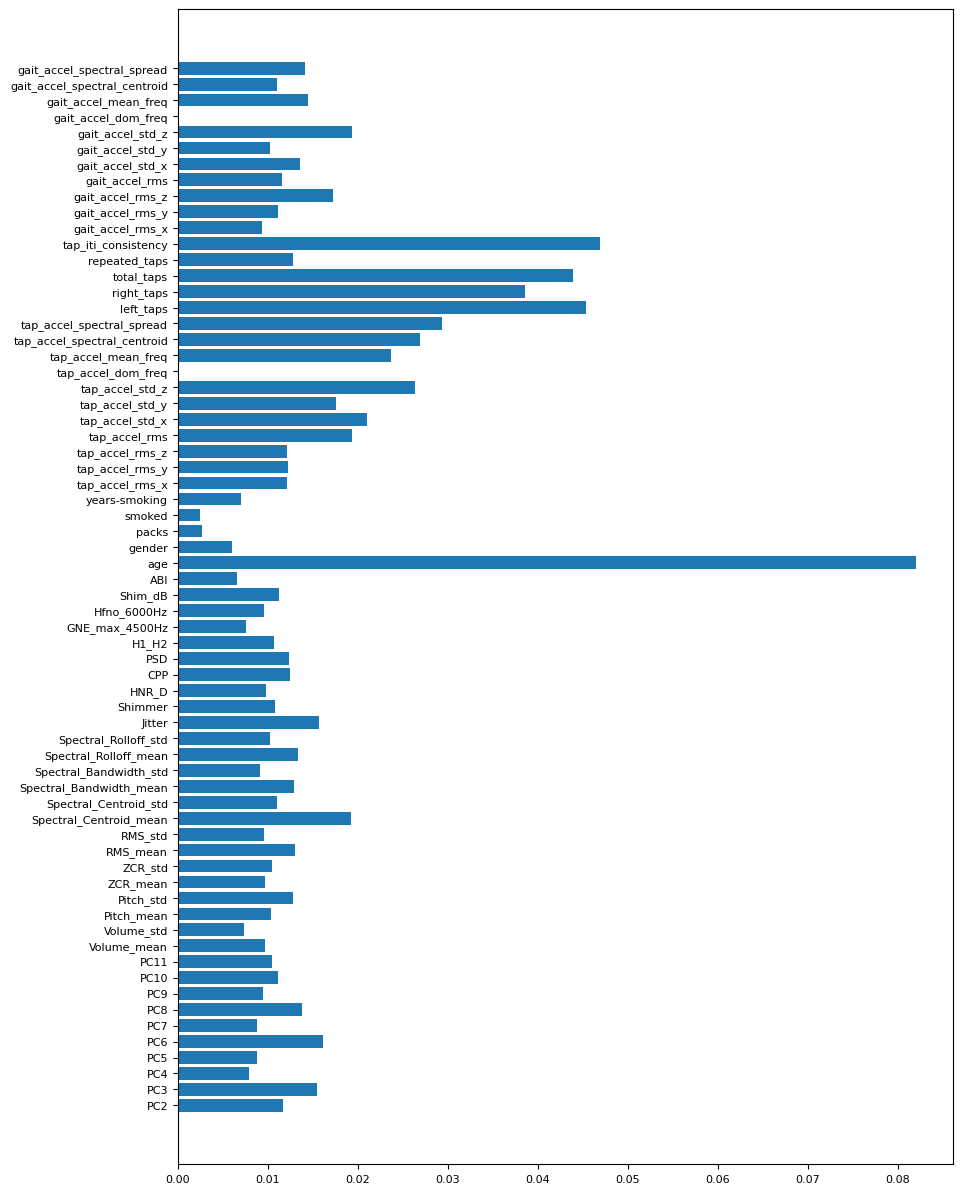

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))

ax.barh(['PC2', 'PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'Volume_mean', 'Volume_std',
       'Pitch_mean', 'Pitch_std', 'ZCR_mean', 'ZCR_std', 'RMS_mean', 'RMS_std',
       'Spectral_Centroid_mean', 'Spectral_Centroid_std',
       'Spectral_Bandwidth_mean', 'Spectral_Bandwidth_std',
       'Spectral_Rolloff_mean', 'Spectral_Rolloff_std', 'Jitter', 'Shimmer',
       'HNR_D', 'CPP', 'PSD', 'H1_H2', 'GNE_max_4500Hz', 'Hfno_6000Hz',
       'Shim_dB', 'ABI', 'age', 'gender', 'packs', 'smoked', 'years-smoking',
       'tap_accel_rms_x', 'tap_accel_rms_y', 'tap_accel_rms_z',
       'tap_accel_rms', 'tap_accel_std_x', 'tap_accel_std_y',
       'tap_accel_std_z', 'tap_accel_dom_freq', 'tap_accel_mean_freq',
       'tap_accel_spectral_centroid', 'tap_accel_spectral_spread',
       'left_taps', 'right_taps', 'total_taps',
       'repeated_taps', 'tap_iti_consistency', 'gait_accel_rms_x',
       'gait_accel_rms_y', 'gait_accel_rms_z', 'gait_accel_rms',
       'gait_accel_std_x', 'gait_accel_std_y', 'gait_accel_std_z',
       'gait_accel_dom_freq', 'gait_accel_mean_freq',
       'gait_accel_spectral_centroid', 'gait_accel_spectral_spread'], feature_importances_avg)

ax.tick_params(axis='both', labelsize=8)

plt.show()

**Selecting Top Features by Percentile**

In [6]:
count = 0
for i in range (len(feature_importances_avg)):
  if feature_importances_avg[i] >= np.percentile(feature_importances_rf[0], 80):
    print("'" + df.columns[i+3] + "', ", end="")
    count += 1

print(count)

'Spectral_Centroid_mean', 'age', 'tap_accel_rms', 'tap_accel_std_x', 'tap_accel_std_y', 'tap_accel_std_z', 'tap_accel_mean_freq', 'tap_accel_spectral_centroid', 'tap_accel_spectral_spread', 'left_taps', 'right_taps', 'total_taps', 'tap_iti_consistency', 'gait_accel_rms_z', 'gait_accel_std_z', 15


**Select top features in order for final feature dataframe. Then, multiply each feature by its feature importance to emphasize the contributions of significant features. Finally, multiply by 10 to control that the feature magnitude without changing the relative weights.**

In [7]:
# Convert feature_importances_avg to a pandas Series for easier sorting
feature_importances_series = pd.Series(feature_importances_avg, index=features_final.columns)

# Sort feature importances in descending order and select the top 15 (80th percentile)
top_features = feature_importances_series.sort_values(ascending=False).head(15)

# Select the top features from the features_final dataset
features_top_15 = features_final[top_features.index]

# Multiply each feature by 10 times its feature importance
for feature in top_features.index:
    features_top_15[feature] = features_top_15[feature] * (10 * top_features[feature])

# Concatenate the labels first and then the transformed feature columns
new_df = pd.concat([labels_final, features_top_15], axis=1)
new_df.head()

<ipython-input-7-a18317779892>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_top_15[feature] = features_top_15[feature] * (10 * top_features[feature])


,diagnosis,age,tap_iti_consistency,left_taps,total_taps,right_taps,tap_accel_spectral_spread,tap_accel_spectral_centroid,tap_accel_std_z,tap_accel_mean_freq,tap_accel_std_x,gait_accel_std_z,tap_accel_rms,Spectral_Centroid_mean,tap_accel_std_y,gait_accel_rms_z
0,0,-0.329840,0.004053,0.157347,0.158860,0.142887,0.289218,0.236285,0.013079,0.208433,0.203332,-0.031605,0.105973,-0.141750,0.074517,-0.045262
1,1,1.055015,0.095887,0.036131,0.092015,0.129903,0.259967,0.402526,0.155738,0.355077,-0.001747,0.274168,0.079586,-0.151273,-0.048371,0.259153
2,1,0.639558,0.037065,-0.372970,-0.398182,-0.376501,0.138048,-0.036333,-0.052034,-0.032050,0.025425,0.178524,-0.143964,0.315010,-0.016278,0.122602
3,0,0.778044,0.010811,-0.342666,-0.368473,-0.350532,0.219468,0.125846,-0.059757,0.111012,-0.078233,-0.146392,0.240578,0.119135,-0.093588,-0.135006
4,1,0.778044,0.338661,-0.418425,-0.427891,-0.389486,-0.106831,-0.086215,0.149306,-0.076053,0.091212,-0.117467,0.014885,-0.195404,0.080355,-0.091860


In [15]:
top_features

,0
age,0.082030
tap_iti_consistency,0.046870
left_taps,0.045338
total_taps,0.043864
right_taps,0.038588
tap_accel_spectral_spread,0.029348
tap_accel_spectral_centroid,0.026897
tap_accel_std_z,0.026357
tap_accel_mean_freq,0.023726
tap_accel_std_x,0.020974


In [ ]:
new_df.to_csv('/content/gdrive/My Drive/pd_diagnosis/Zeno Paper/scaled_df.csv')

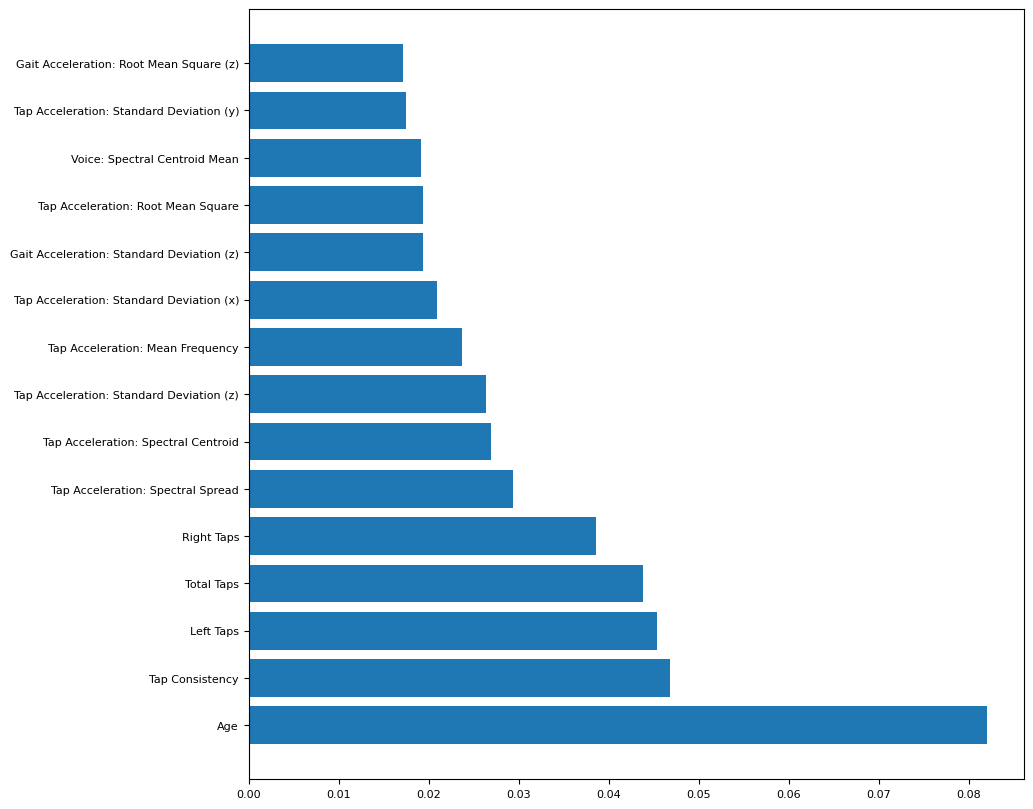

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.barh(['Age'	,'Tap Consistency'	,'Left Taps',	'Total Taps',	'Right Taps',	'Tap Acceleration: Spectral Spread',	'Tap Acceleration: Spectral Centroid',	'Tap Acceleration: Standard Deviation (z)'	,'Tap Acceleration: Mean Frequency',	'Tap Acceleration: Standard Deviation (x)',	'Gait Acceleration: Standard Deviation (z)'	,'Tap Acceleration: Root Mean Square'	,'Voice: Spectral Centroid Mean',	'Tap Acceleration: Standard Deviation (y)',	'Gait Acceleration: Root Mean Square (z)'], top_features)

ax.tick_params(axis='both', labelsize=8)

plt.show()